In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [2]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [3]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = ['../input/intel-image-classification/seg_train/seg_train',
                '../input/intel-image-classification/seg_test/seg_test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [4]:
(x_train,y_train),(x_test,y_test)=load_data()

Loading ../input/intel-image-classification/seg_train/seg_train


100%|██████████| 2404/2404 [00:13<00:00, 175.54it/s]


Loading ../input/intel-image-classification/seg_test/seg_test


100%|██████████| 553/553 [00:02<00:00, 206.12it/s]


In [5]:
n_train = y_train.shape[0]
n_test = y_test.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 14034
Number of testing examples: 3000
Each image is of size: (150, 150)


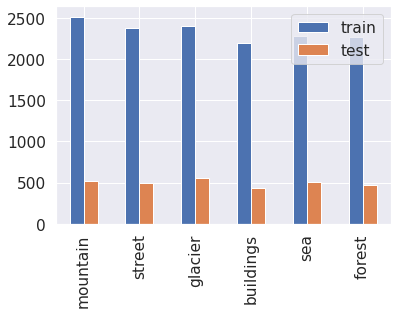

In [6]:
import pandas as pd
_, train_counts = np.unique(y_train, return_counts=True)
_, test_counts = np.unique(y_test, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

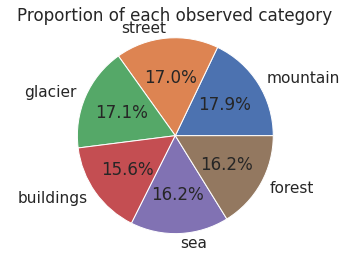

In [7]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [8]:
x_train=x_train/255.0
x_test=x_test/255.0

In [9]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

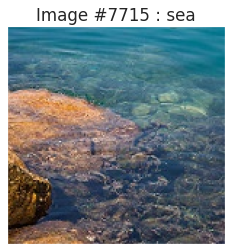

In [10]:
display_random_image(class_names, x_train, y_train)

In [11]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

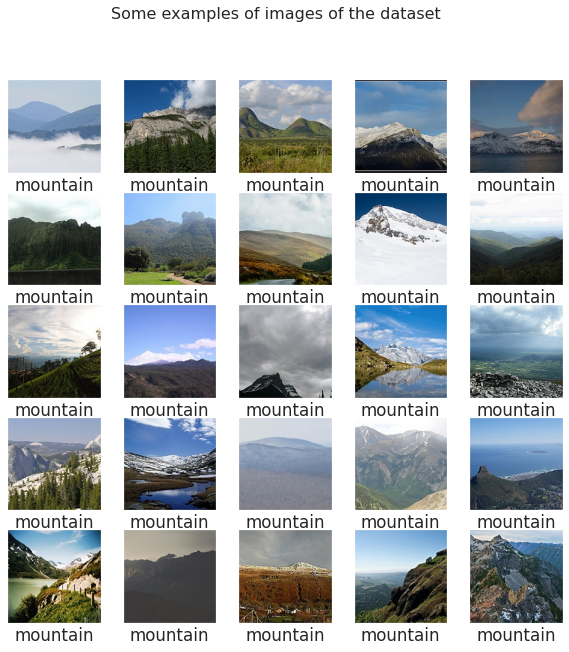

In [12]:
display_examples(class_names, x_train, y_train)

# CNN

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

2022-07-23 06:42:54.315771: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-23 06:42:54.451323: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-23 06:42:54.452349: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-23 06:42:54.453848: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [14]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(x_train,y_train, batch_size=64, epochs=20, validation_split = 0.2)

2022-07-23 06:42:57.091874: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 3031290000 exceeds 10% of free system memory.
2022-07-23 06:43:00.086708: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 3031290000 exceeds 10% of free system memory.
2022-07-23 06:43:02.232399: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2022-07-23 06:43:03.545269: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


176/176 [==============================] - ETA: 0s - loss: 0.9587 - accuracy: 0.6435

2022-07-23 06:43:13.030381: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 757890000 exceeds 10% of free system memory.
2022-07-23 06:43:13.908484: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 757890000 exceeds 10% of free system memory.


176/176 [==============================] - 13s 33ms/step - loss: 0.9587 - accuracy: 0.6435 - val_loss: 9.8351 - val_accuracy: 0.1315
Epoch 2/20
176/176 [==============================] - 4s 23ms/step - loss: 0.5456 - accuracy: 0.7918 - val_loss: 10.9475 - val_accuracy: 0.1389
Epoch 3/20
176/176 [==============================] - 5s 26ms/step - loss: 0.4000 - accuracy: 0.8502 - val_loss: 13.7034 - val_accuracy: 0.1275
Epoch 4/20
176/176 [==============================] - 4s 21ms/step - loss: 0.2767 - accuracy: 0.8995 - val_loss: 12.3007 - val_accuracy: 0.1300
Epoch 5/20
176/176 [==============================] - 4s 22ms/step - loss: 0.1690 - accuracy: 0.9435 - val_loss: 14.1808 - val_accuracy: 0.1350
Epoch 6/20
176/176 [==============================] - 4s 22ms/step - loss: 0.1138 - accuracy: 0.9636 - val_loss: 13.2114 - val_accuracy: 0.1290
Epoch 7/20
176/176 [==============================] - 4s 21ms/step - loss: 0.0681 - accuracy: 0.9800 - val_loss: 14.1288 - val_accuracy: 0.1329
Epo

2022-07-23 06:45:24.561867: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 810000000 exceeds 10% of free system memory.


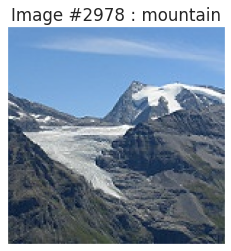

In [16]:
predictions = model.predict(x_test)
pred_labels = np.argmax(predictions, axis = 1)
display_random_image(class_names, x_test, pred_labels)